
T = 5.000000


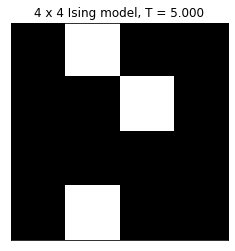

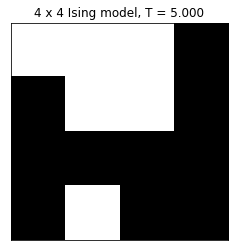

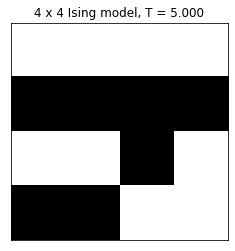

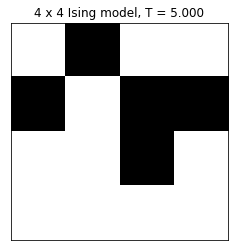

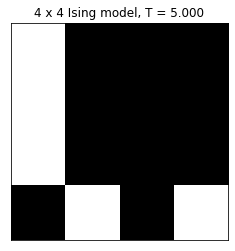

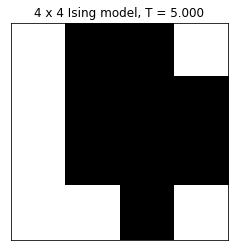

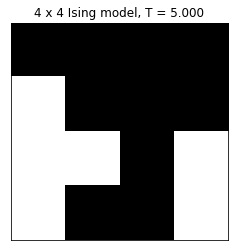

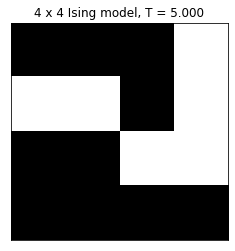

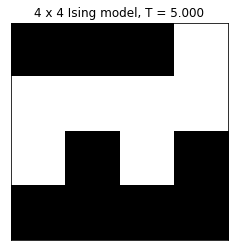

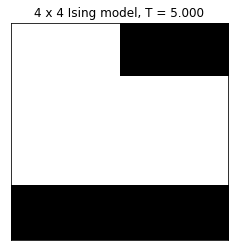

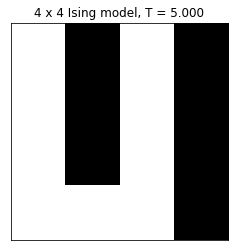

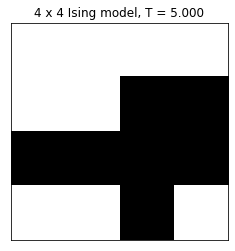

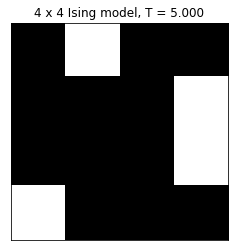

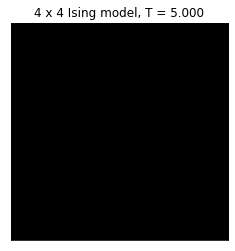

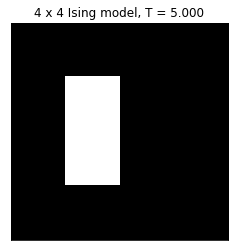

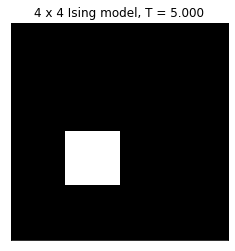

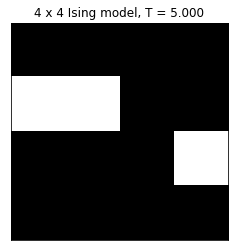

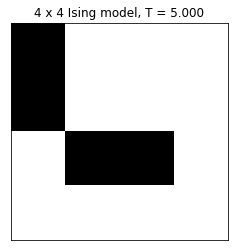

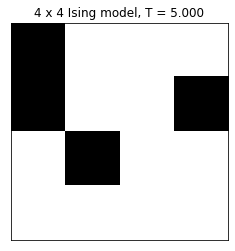

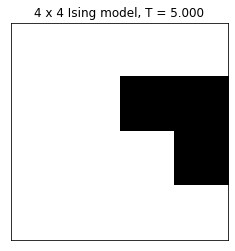


T = 4.500000


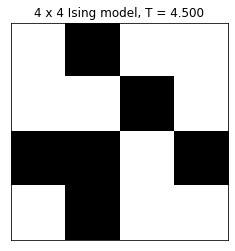

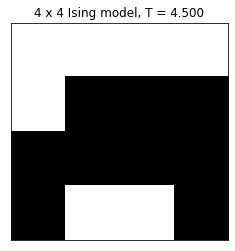

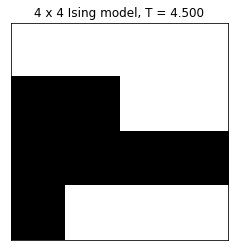

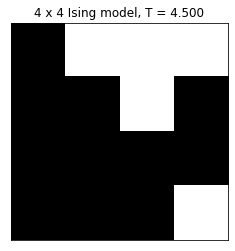

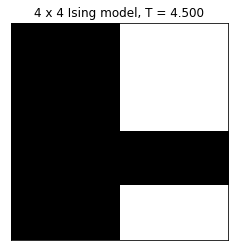

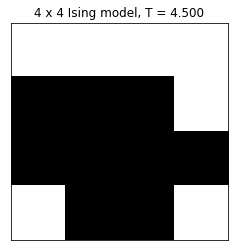

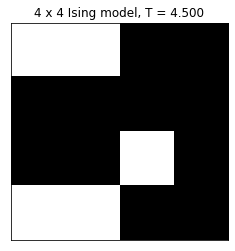

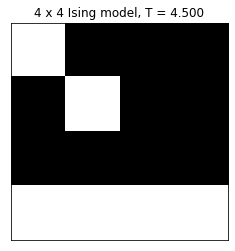

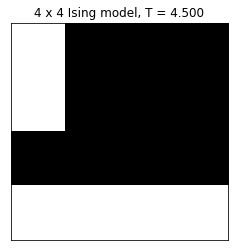

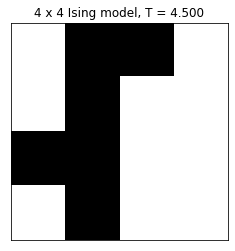

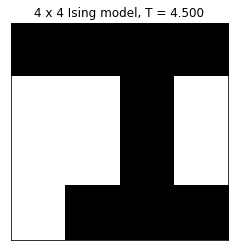

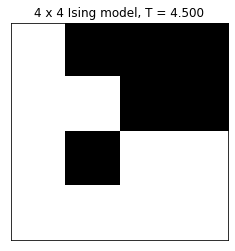

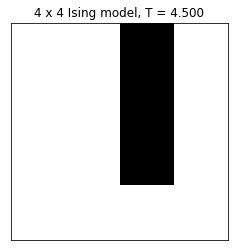

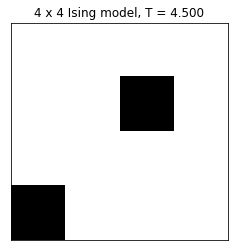

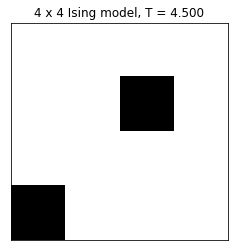

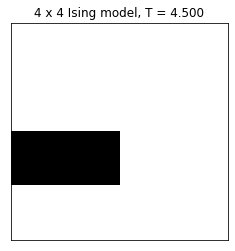

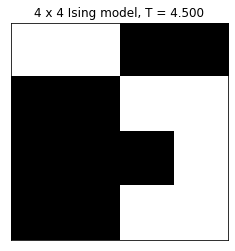

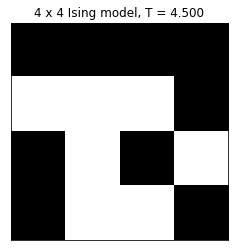

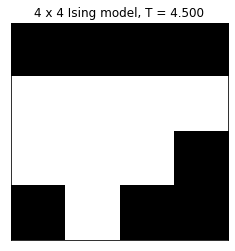

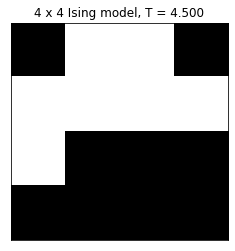


T = 4.000000


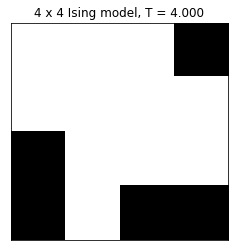

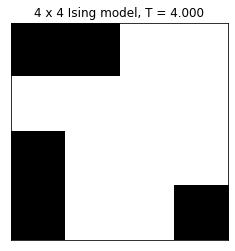

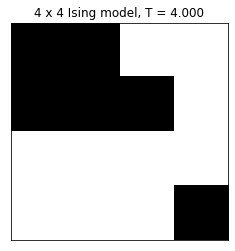

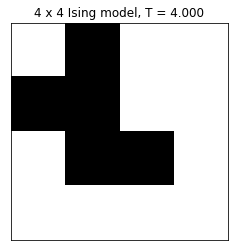

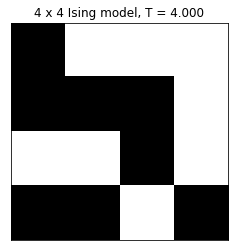

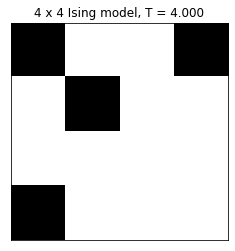

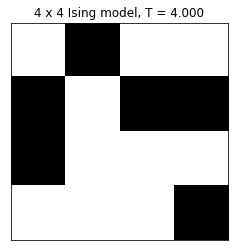

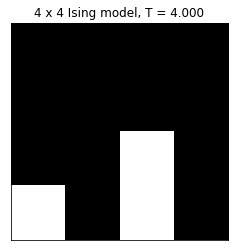

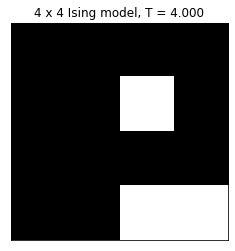

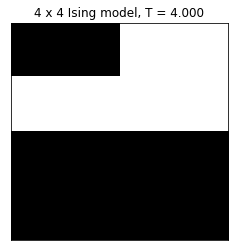

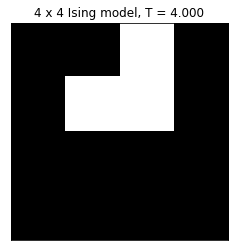

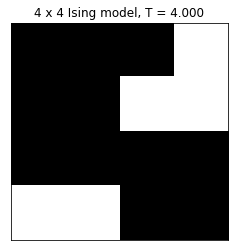

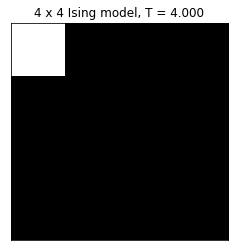

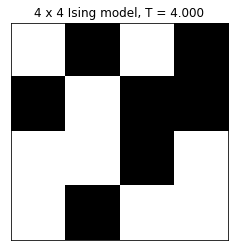

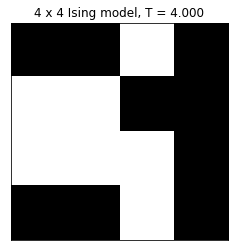

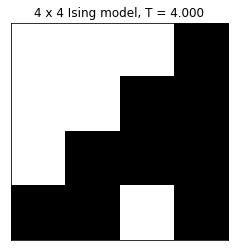

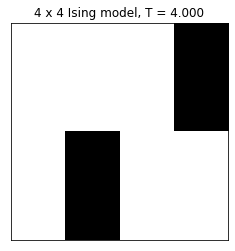

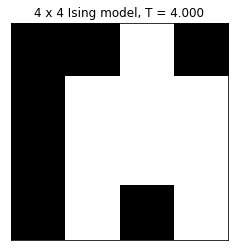

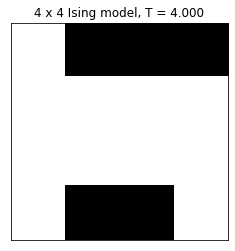

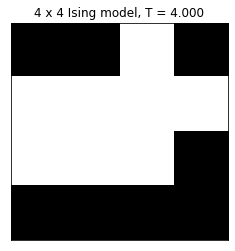


T = 3.500000


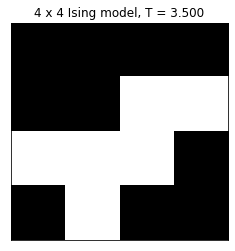

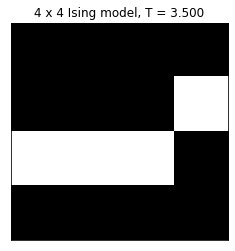

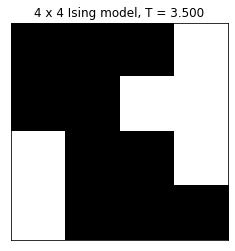

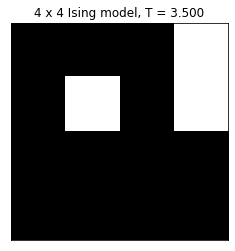

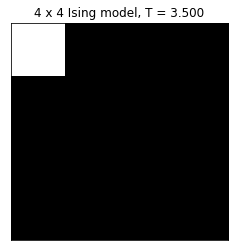

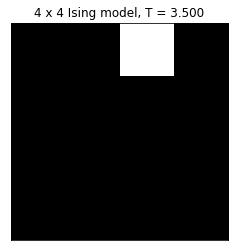

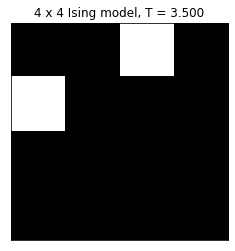

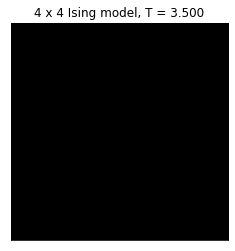

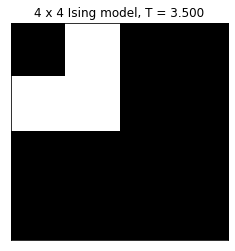

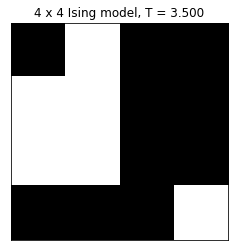

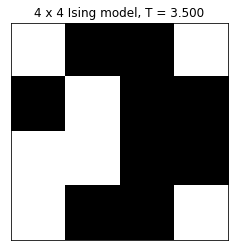

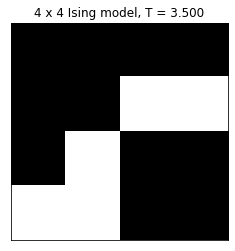

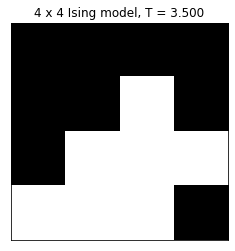

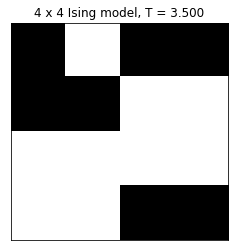

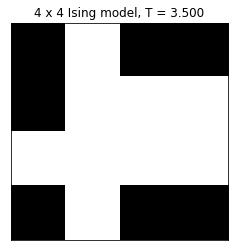

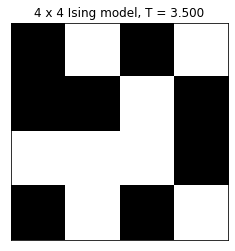

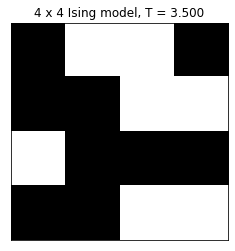

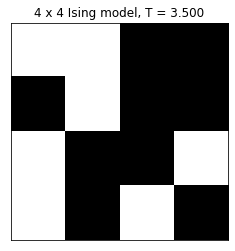

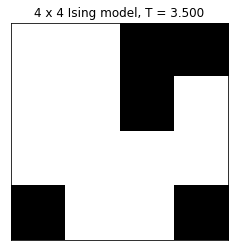

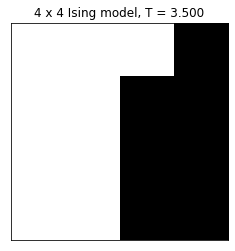


T = 3.000000


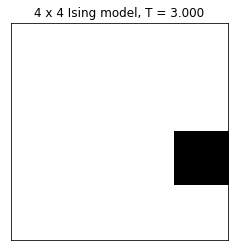

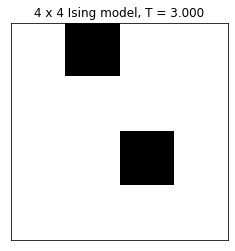

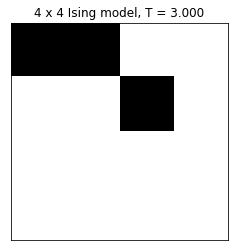

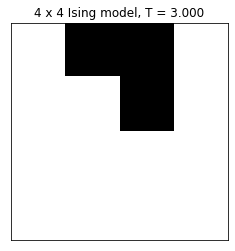

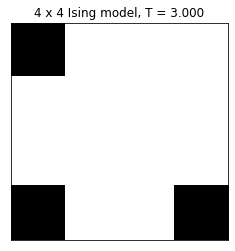

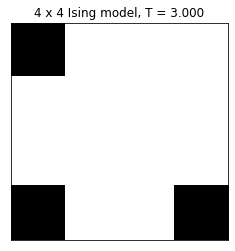

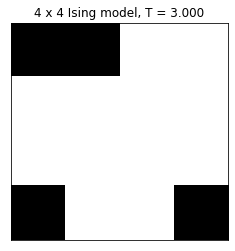

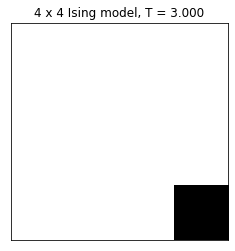

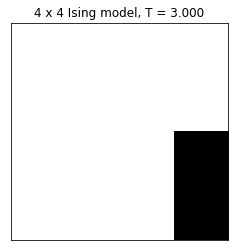

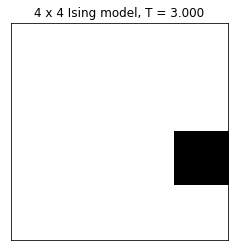

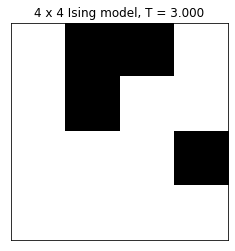

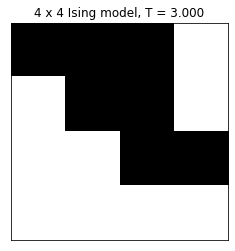

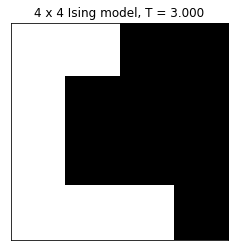

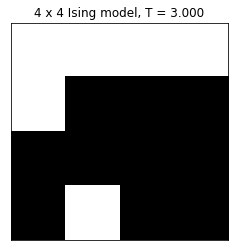

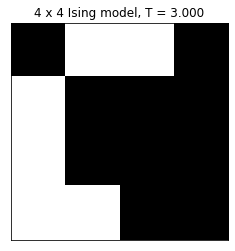

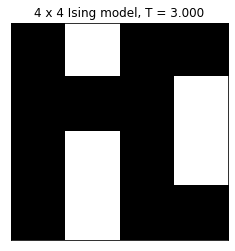

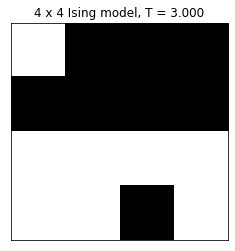

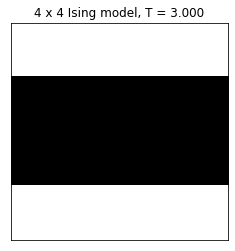

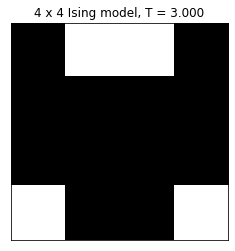

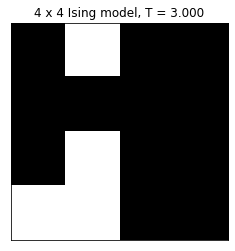


T = 2.500000


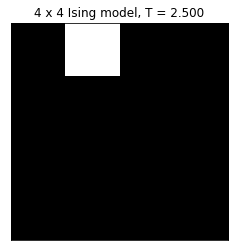

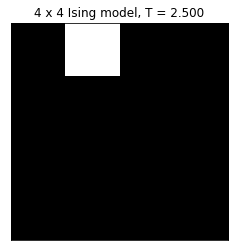

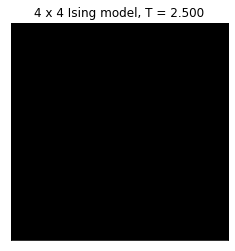

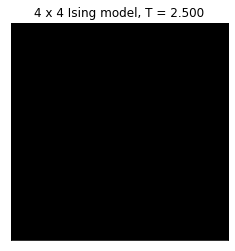

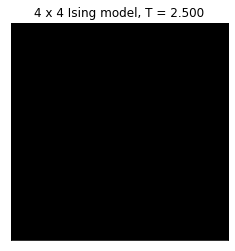

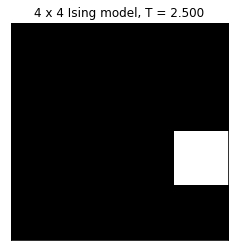

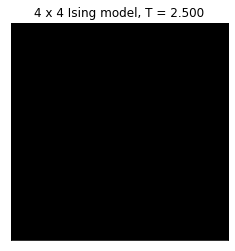

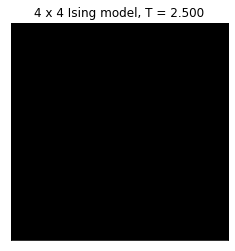

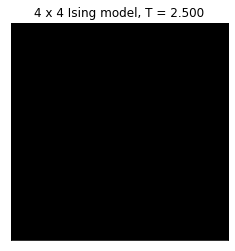

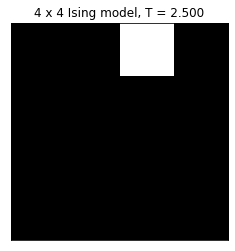

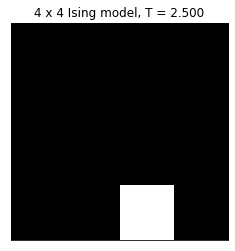

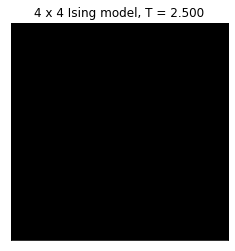

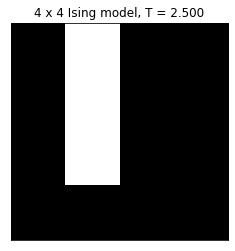

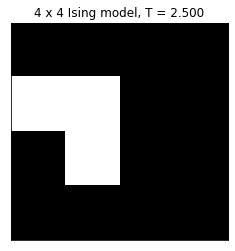

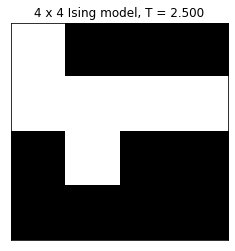

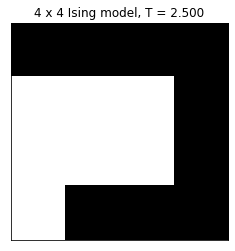

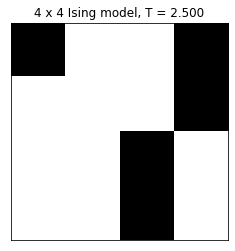

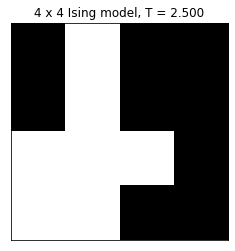

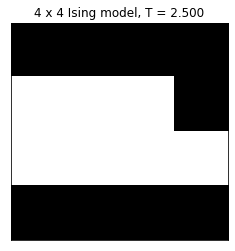

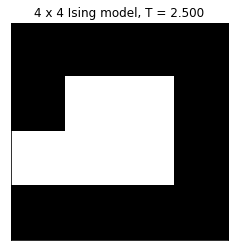


T = 2.000000


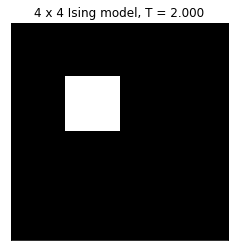

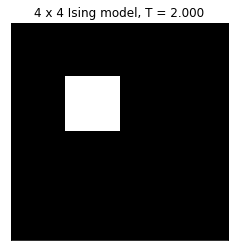

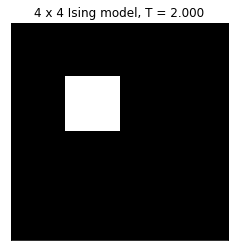

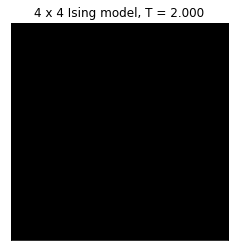

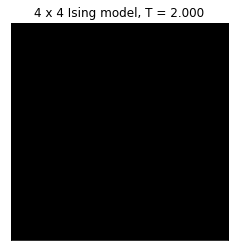

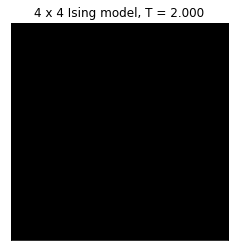

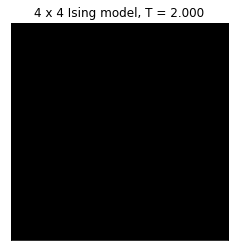

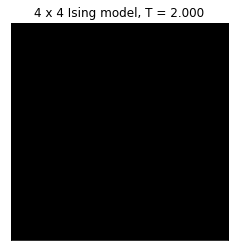

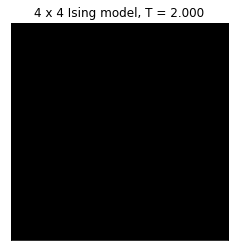

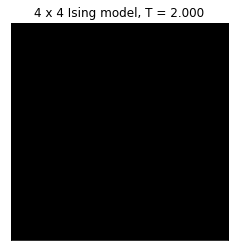

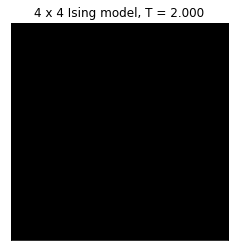

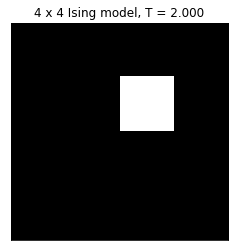

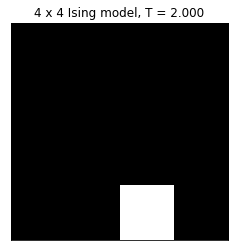

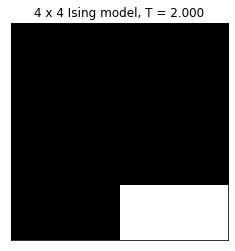

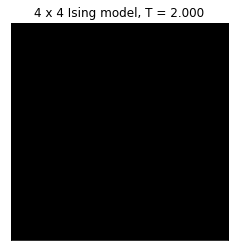

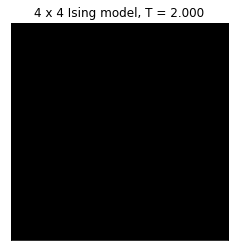

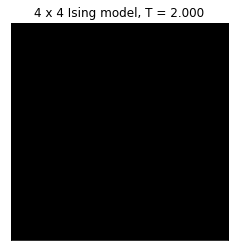

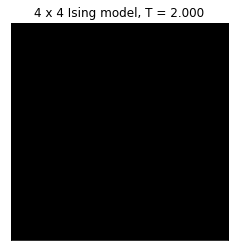

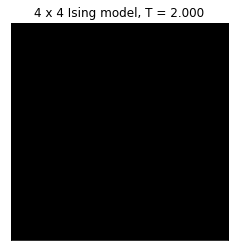

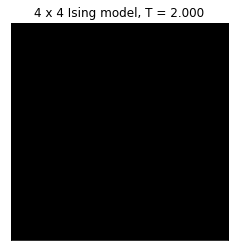


T = 1.500000


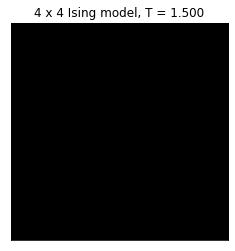

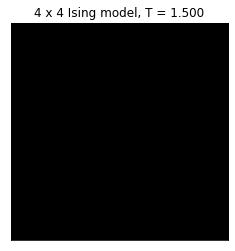

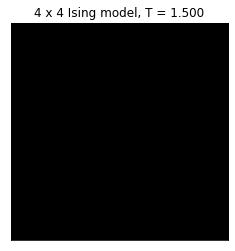

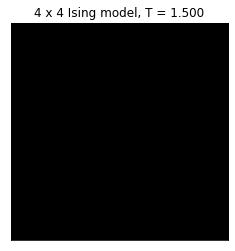

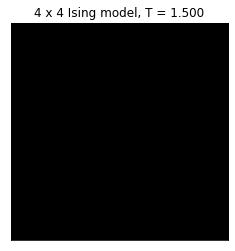

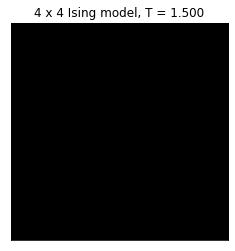

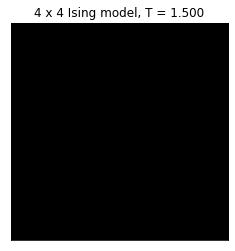

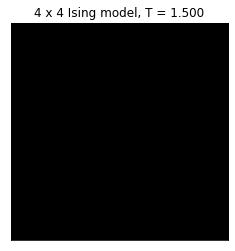

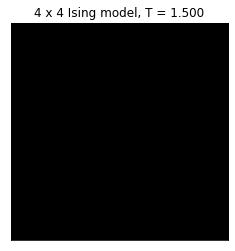

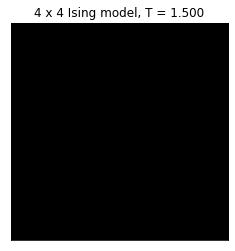

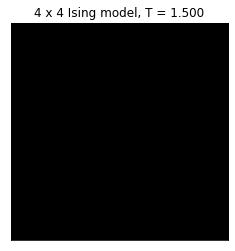

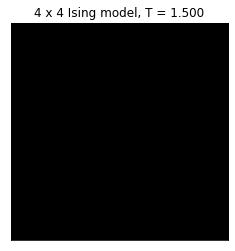

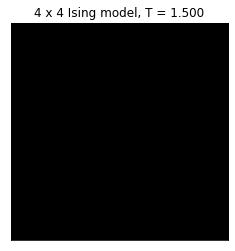

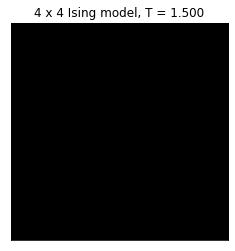

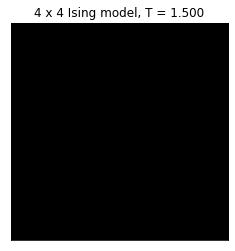

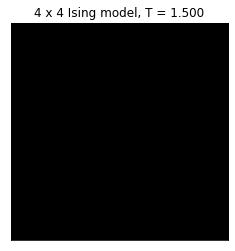

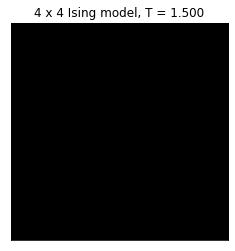

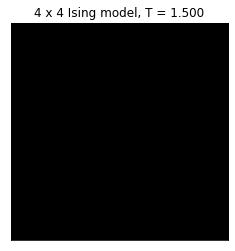

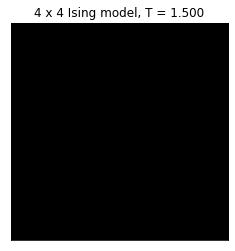

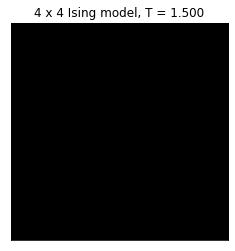


T = 1.000000


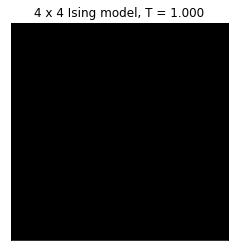

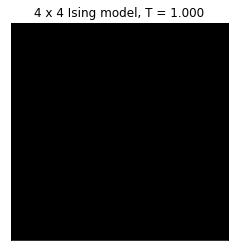

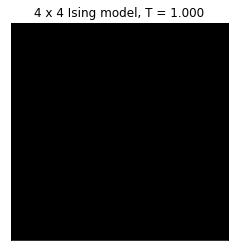

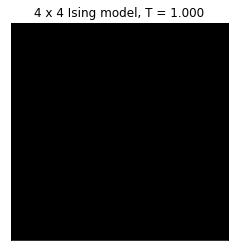

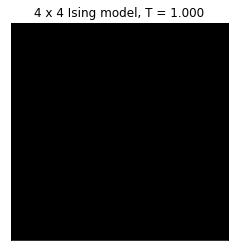

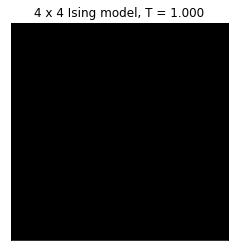

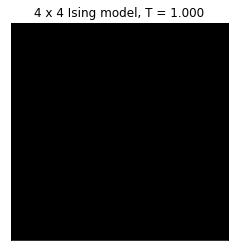

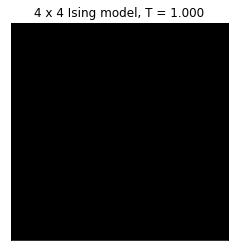

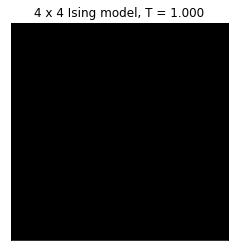

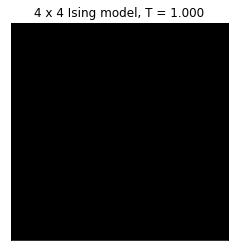

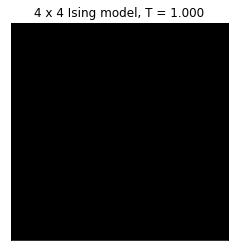

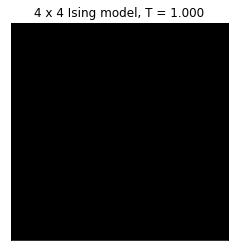

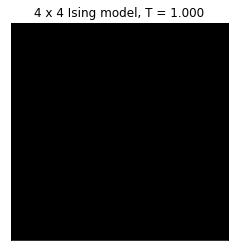

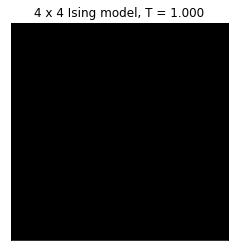

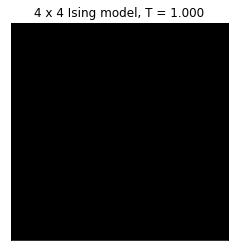

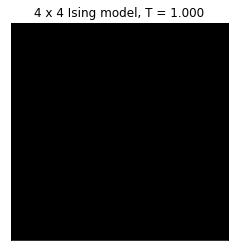

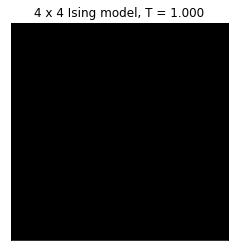

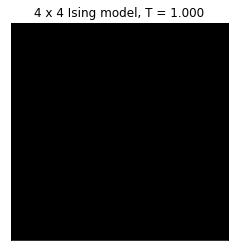

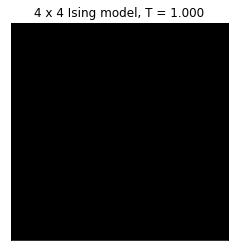

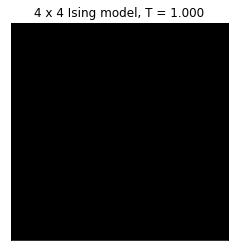


T = 0.500000


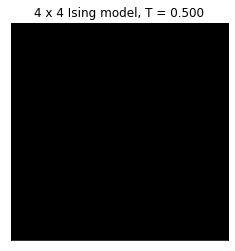

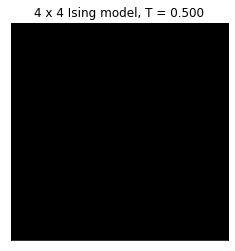

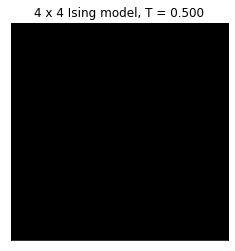

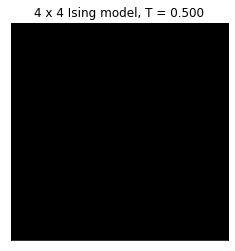

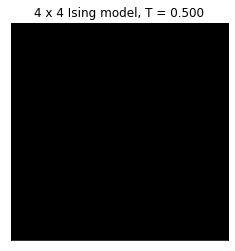

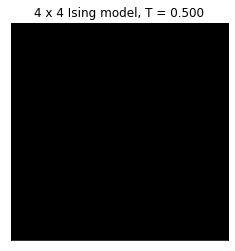

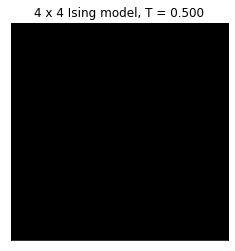

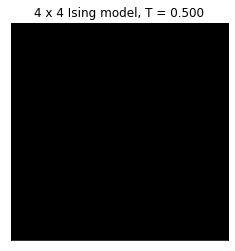

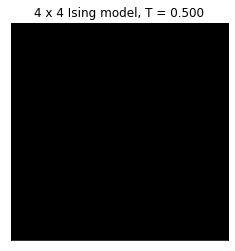

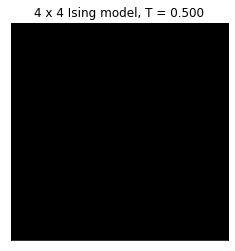

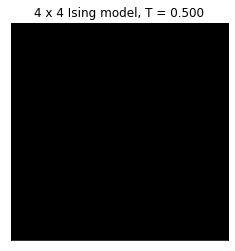

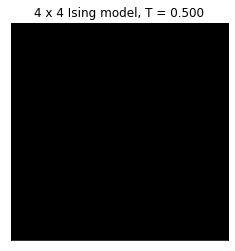

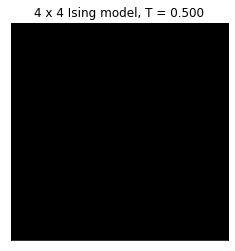

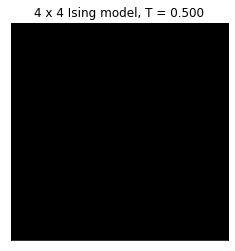

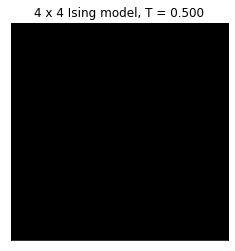

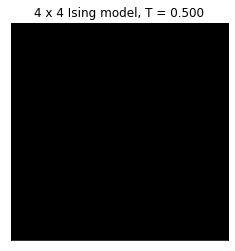

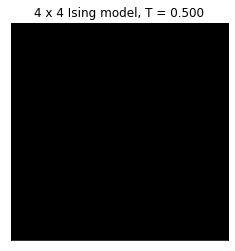

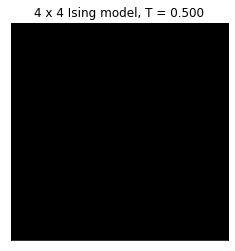

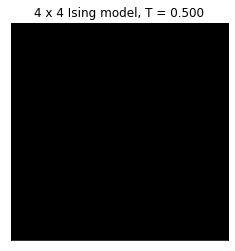

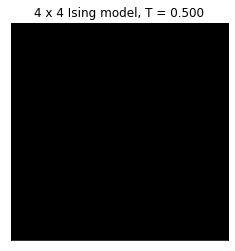

Elapsed time: 20.906954 seconds


In [9]:
########## Machine Learning for Quantum Matter and Technology  ######################
### Juan Carrasquilla, Estelle Inack, Giacomo Torlai, Roger Melko
### with code from Lauren Hayward Sierens/PSI
### Tutorial 1: Monte Carlo for the Ising model
#####################################################################################

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import os
import random
import time

### Input parameters: ###
T_list = np.linspace(5.0,0.5,10) #temperature list
L = 4                            #linear size of the lattice
N_spins = L**2                   #total number of spins
J = 1                            #coupling parameter

### Critical temperature: ###
Tc = 2.0/np.log(1.0 + np.sqrt(2))*J  #T/J ~ 2.269

### Monte Carlo parameters: ###
n_eqSweeps = 0   #number of equilibration sweeps
n_measSweeps = 20  #number of measurement sweeps

### Parameters needed to show animation of spin configurations: ###
animate = True
bw_cmap = colors.ListedColormap(['black', 'white'])

### Create a directory where measured observables will be stored: ###
results_dir = 'Data'
if not(os.path.isdir(results_dir)):
  os.mkdir(results_dir)

### Initially, the spins are in a random state (a high-T phase): ###
spins = np.zeros(N_spins,dtype=np.int)
for i in range(N_spins):
  spins[i] = 2*random.randint(0,1) - 1 #either +1 or -1

### Store each spin's four nearest neighbours in a neighbours array (using periodic boundary conditions): ###
neighbours = np.zeros((N_spins,4),dtype=np.int)
for i in range(N_spins):
  #neighbour to the right:
  neighbours[i,0]=i+1
  if i%L==(L-1):
    neighbours[i,0]=i+1-L
  
  #upwards neighbour:
  neighbours[i,1]=i+L
  if i >= (N_spins-L):
    neighbours[i,1]=i+L-N_spins

  # *********************************************************************** #
  # **********          1a) FILL IN CODE TO CALCULATE           *********** #
  # **********  THE NEIGHBOUR TO THE LEFT (IN neighbours[i,2])  *********** #
  # ********** AND THE DOWNWARDS NEIGHBOUR (IN neighbours[i,3]) *********** #
  # *********************************************************************** #
  #neighbour to the left:
  neighbours[i,2]=i-1
  if i%L==0:
    neighbours[i,2]=i-1+L
  
  #downwards neighbour:
  neighbours[i,3]=i-L
  if i >= (N_spins-L):
    neighbours[i,3]=i+L-N_spins
#end of for loop

### Function to calculate the total energy ###
def getEnergy():
  currEnergy = 0
  for i in range(N_spins):
    currEnergy += -J*( spins[i]*spins[neighbours[i,0]] + spins[i]*spins[neighbours[i,1]] )
  return currEnergy
#end of getEnergy() function

### Function to calculate the total magnetization ###
def getMag():
  return np.sum(spins)
#end of getMag() function

### Function to perform one Monte Carlo sweep ###
def sweep():
  #do one sweep (N_spins single-spin flips):
  for i in range(N_spins):
    #randomly choose which spin to consider flipping:
    site = random.randint(0,N_spins-1)
    
    #calculate the change in energy for the proposed move:
    E_init = getEnergy()
    spins[site] = -spins[site] #flip the spin before calculating E_final
    E_final = getEnergy()
    spins[site] = -spins[site] #flip the spin back since we might not accept the move
    deltaE = E_final - E_init
    # *********************************************************************** #
    # ************       1c) REPLACE THE ABOVE FIVE LINES.        *********** #
    # ************ FILL IN CODE TO CALCULATE THE CHANGE IN ENERGY *********** #
    # ************     USING ONLY THE FOUR NEAREST NEIGHBOURS     *********** #
    # *********************************************************************** #
  
    if (deltaE <= 0) or (random.random() < np.exp(-deltaE/T)):  #Metropolis algorithm
      #flip the spin:
      spins[site] = -spins[site]
  #end loop over i
#end of sweep() function

#################################################################################
########## Loop over all temperatures and perform Monte Carlo updates: ##########
#################################################################################
t1 = time.clock() #for timing
for T in T_list:
  print('\nT = %f' %T)
  
  #open a file where observables will be recorded:
  fileName         = '%s/ising2d_L%d_T%.4f.txt' %(results_dir,L,T)
  file_observables = open(fileName, 'w')
  
  #equilibration sweeps:
  for i in range(n_eqSweeps):
    sweep()

  #start doing measurements:
  for i in range(n_measSweeps):
    sweep()

    #Write the observables to file:
    energy = getEnergy()
    mag    = getMag()
    file_observables.write('%d \t %.8f \t %.8f \n' %(i, energy, mag))

    if animate:
      #Display the current spin configuration:
      plt.clf()
      plt.imshow( spins.reshape((L,L)), cmap=bw_cmap, norm=colors.BoundaryNorm([-1,0,1], bw_cmap.N), interpolation='nearest' )
      plt.xticks([])
      plt.yticks([])
      plt.title('%d x %d Ising model, T = %.3f' %(L,L,T))
      plt.pause(0.01)
    #end if

    if (i+1)%1000==0:
      print('  %d sweeps complete' %(i+1))
  #end loop over i

  file_observables.close()
#end loop over temperature

t2 = time.clock()
print('Elapsed time: %f seconds' %(t2-t1))
